-------------------------------------------------------
================== 1.Data Selection ===================
-------------------------------------------------------

   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOON

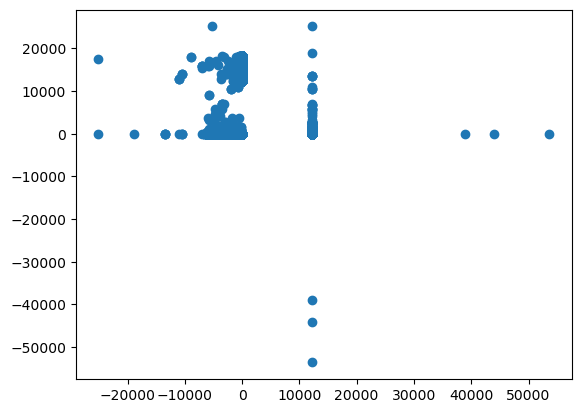

-------------------- 5.K MEANS ----------------------------



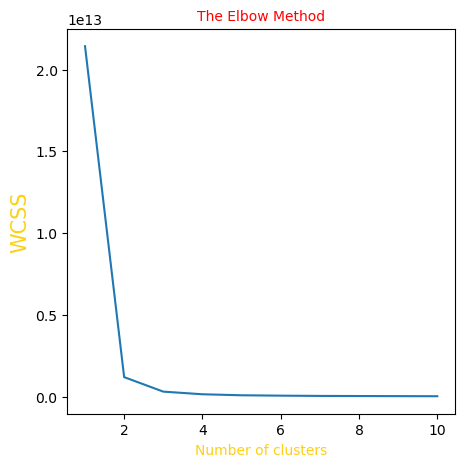

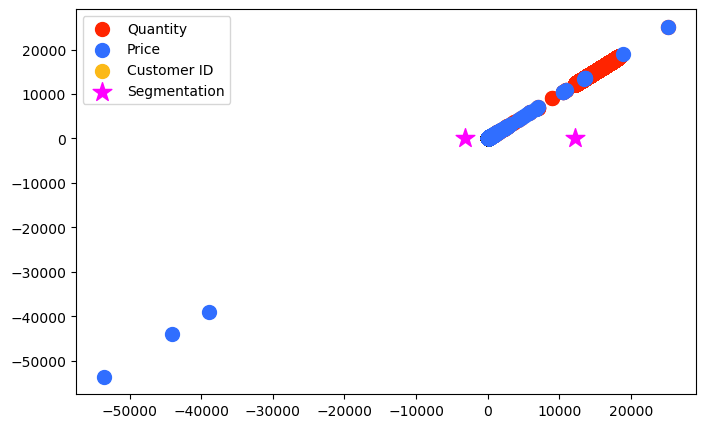

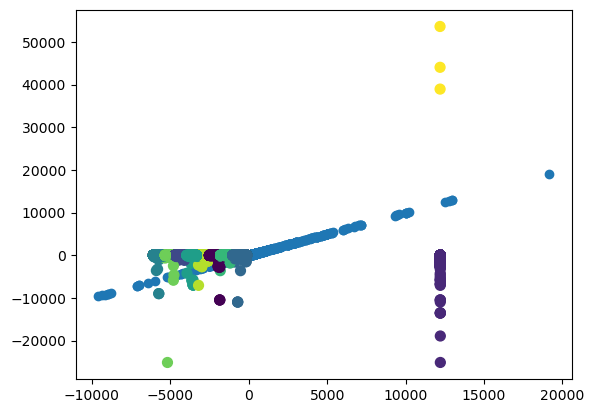

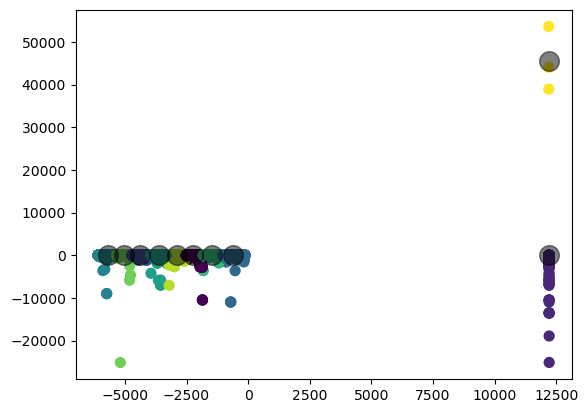

--------------------------------------
 LOGISTIC REGRESSION
--------------------------------------

1. Accuracy =  87.73266666666666

2. MAE     = 12.267333333333333

--------------------------------------
 LOGISTIC REGRESSION
--------------------------------------

1. Accuracy =  90.34333333333333

2. MAE = 9.656666666666666



In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_excel("online_retail_II.xlsx")
print("-------------------------------------------------------")
print("================== 1.Data Selection ===================")
print("-------------------------------------------------------")
print()
print(data_frame.head(20))


#=====================  2.DATA PREPROCESSING ==========================


#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("------------------------------------------------------")
print("================ 2.1 Checking missing values =========")
print("------------------------------------------------------")
print()
print(data_frame.isnull().sum())
print()
print("----------------------------------------------------------")
print("=========== After Checking Missing Values ================")
print("-----------------------------------------------------------")
print()
data_frame=data_frame.fillna(0)
print(data_frame.isnull().sum())


#=== DROP UNWANTED COLUMNS ===

data_frame=data_frame.drop(["StockCode","Description","InvoiceDate","Invoice","Country"],axis=1)



#====================== 3. DATA SPLITTING =============================

x=data_frame.drop('Quantity',axis=1)
y=data_frame['Quantity']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=50)


print("=========================================================")
print("-------------------- 3.Data Splitting -------------------")
print("==========================================================")
print()
print("Total number of rows in dataset:", data_frame.shape[0])
print()
print("Total number of rows in training data:", X_train.shape[0])
print()
print("Total number of rows in testing data:", X_test.shape[0])


#========================== 4. PCA ===================================

from sklearn.decomposition import PCA
pca = PCA(random_state=1).fit(x)

print("=========================================================")
print("-------------------- 4.PCA ----------------------------")
print("==========================================================")
print()

pca_samp = pca.transform(x)

plt.scatter(pca_samp, x)
plt.show()

#====================== 5. K MEANS  =============================

print("=========================================================")
print("-------------------- 5.K MEANS ----------------------------")
print("==========================================================")
print()

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.subplots(figsize=(5,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', color="RED",size=10)
plt.xlabel('Number of clusters', color="#FDD017",size=10)
plt.ylabel('WCSS', color="#FDD017",size=15) 


kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(pca_samp)
y_kmeans

import matplotlib.pyplot as plt

plt.subplots(figsize=(8,5))
plt.scatter(x[y_kmeans == 0], x[y_kmeans == 0], s = 100, c = '#FF2400', label = 'Quantity')
plt.scatter(x[y_kmeans == 1], x[y_kmeans == 1], s = 100, c = '#306EFF', label = 'Price')
plt.scatter(x[y_kmeans == 2], x[y_kmeans == 2], s = 100, c = '#FBB917', label = 'Customer ID')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = '#FF00FF',marker = '*', label = 'Segmentation')
_ = plt.legend()
plt.show() 


plt.scatter(y, y)

#==== cluster customers =====

kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(pca_samp)
k_fit

k_fit.n_clusters

k_fit.cluster_centers_


k_fit.labels_

k_means = KMeans(n_clusters=10).fit(pca_samp)
kumeler = k_means.labels_
cus_kmeans = pd.DataFrame(pca_samp)

plt.scatter(cus_kmeans.iloc[:, 0],
            cus_kmeans.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")
plt.show()

merkezler = k_means.cluster_centers_

plt.scatter(cus_kmeans.iloc[:, 0],
            cus_kmeans.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="black",
            s=200,
            alpha=0.5)
plt.show()


#====================== CLASSIFICATION  =============================

# === DT ====

from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train[0:1500],Y_train[0:1500])


y_pred_dt=clf.predict(X_test[0:1500])

from sklearn import metrics

mae_dt=metrics.mean_absolute_error(y_pred_dt,Y_test[0:1500])

acc_dt= 100- mae_dt


print("--------------------------------------")
print(" LOGISTIC REGRESSION")
print("--------------------------------------")
print()

print("1. Accuracy = ", acc_dt)
print()
print("2. MAE     =", mae_dt)
print()




# ==== LR =====


from sklearn import linear_model

lr=linear_model.LogisticRegression()

lr.fit(X_train[0:1500],Y_train[0:1500])


y_pred_lr=lr.predict(X_test[0:1500])

from sklearn import metrics

mae_lr=metrics.mean_absolute_error(y_pred_lr,Y_test[0:1500])

acc_lr= 100- mae_lr


print("--------------------------------------")
print(" LOGISTIC REGRESSION")
print("--------------------------------------")
print()

print("1. Accuracy = ", acc_lr)
print()
print("2. MAE =", mae_lr)
print()

